In [1]:
from GeneticAlg import GenProg
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [2]:
dataEmployee = pd.read_csv('EmployeeText.csv')
numeric_colsEmp = ['Salary']
dataEmployee[numeric_colsEmp] = MinMaxScaler().fit_transform(dataEmployee[numeric_colsEmp])
dataEmployee.head()

,Employee,Salary,Gender,Age,Experience,Training
0,1,0.217689,F,42,3,B
1,2,0.757334,M,54,10,B
2,3,0.745610,M,47,10,A
3,4,0.763792,M,47,1,B
4,5,0.690624,M,44,5,B


In [3]:
varEmployee = [['Experience', 'Salary']]
for i in range(len(dataEmployee)):
    varEmployee.append([dataEmployee['  Experience'][i], dataEmployee['Salary'][i]])

In [4]:
genP = GenProg(test=varEmployee, variables=varEmployee[0][:-1], populationSize=100, 
               treeDepth=4, elitism=2, mutationChance=0.2, epochs=500, error=1e-3)
genEvEmpl = genP.findSolution()

0 : 2.1109999579493888e-06 s


/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  '/' : lambda x, y: (x) / (y),
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:62: RuntimeWarning: invalid value encountered in scalar divide
  '/' : lambda x, y: (x) / (y),
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:62: RuntimeWarning: invalid value encountered in divide
  '/' : lambda x, y: (x) / (y),
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:63: RuntimeWarning: divide by zero encountered in power
  '**' : lambda x, y: (math.copysign(abs(x**y), x)
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:63: RuntimeWarning: overflow encountered in power
  '**' : lambda x, y: (math.copysign(abs(x**y), x)
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:62: RuntimeWarning: divide by zero encountered in divide
  '/' : lambda x, y: (x) / (y),
/home/petar/Docu

100 : 7.09935521800071 s
200 : 14.38143223499992 s
300 : 21.603323500999977 s


/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:60: RuntimeWarning: invalid value encountered in scalar subtract
  '-' : lambda x, y: (x) - (y),


400 : 28.418448202000036 s
elapse time :  35.166700 s 
solution: ((cos(0.6070573090615533) + (Experience * 0.13002743044609066)) * (0.13002743044609066 * 2.718281828459045)) 
fitness: 0.05394942198845698


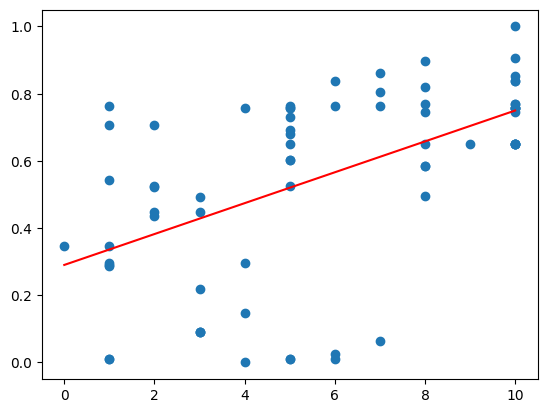

In [5]:
varX = [v[0] for v in varEmployee[1:]]
varY = [v[1] for v in varEmployee[1:]]

axisX = [['Experience']]
for n in np.linspace(min(varX), max(varX), 100):
    axisX.append([n])

bestGeneValues = [n[-1] for n in genP.bestFit.gene.valueCalcVar(axisX)[1:]]


plt.scatter(varX, varY)
plt.plot(axisX[1:], bestGeneValues, c = 'red')

plt.show()

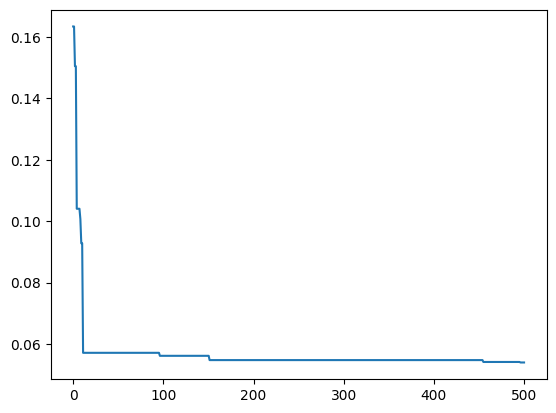

In [6]:
plt.plot(np.linspace(0, len(genEvEmpl), 500), genEvEmpl)
plt.show()

In [7]:
data = pd.read_csv('cars.csv')
numeric_cols = ['EngineSize', 'Weight', 'Horsepower']
data[numeric_cols] = MinMaxScaler().fit_transform(data[numeric_cols])
data.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,0.314286,6.0,0.449649,17.0,23.0,0.487079,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,0.100000,4.0,0.297424,24.0,31.0,0.173783,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,0.157143,4.0,0.297424,22.0,29.0,0.258427,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,0.271429,6.0,0.461358,20.0,28.0,0.323034,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,0.314286,6.0,0.355972,18.0,24.0,0.380150,115.0,197.0


In [8]:
varData = [['Weight', 'Horsepower']]

for i in range(len(data)):
    varData.append([data['Weight'][i], data['Horsepower'][i]])

In [9]:
carsGenP = GenProg(test=varData, variables=varData[0][:-1], populationSize=100, treeDepth=3, elitism=2, mutationChance=0.2, epochs=500, error=1e-3)
genEvCar = carsGenP.findSolution()

0 : 2.0529996618279256e-06 s


/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  '/' : lambda x, y: (x) / (y),
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:62: RuntimeWarning: invalid value encountered in scalar divide
  '/' : lambda x, y: (x) / (y),
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:63: RuntimeWarning: divide by zero encountered in scalar power
  '**' : lambda x, y: (math.copysign(abs(x**y), x)
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:63: RuntimeWarning: invalid value encountered in scalar power
  '**' : lambda x, y: (math.copysign(abs(x**y), x)
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:61: RuntimeWarning: invalid value encountered in scalar multiply
  '*' : lambda x, y: (x) * (y),


100 : 20.372004232999643 s
200 : 40.60262875099943 s
300 : 60.742975215000115 s
400 : 82.04245406999962 s
elapse time :  102.362576 s 
solution: ((Weight ** 0.8842207343772674) * cos(Weight)) 
fitness: 0.015860287347622133


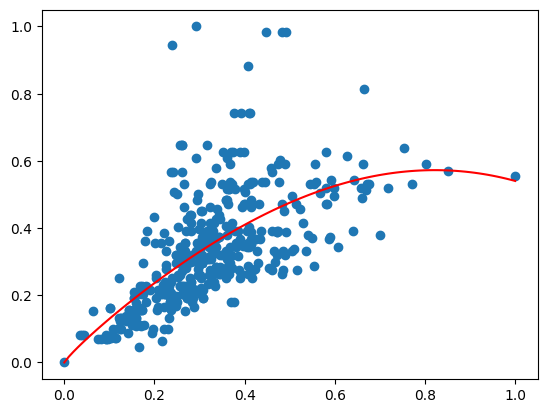

In [10]:
xCars = [v[0] for v in varData[1:]]
yCars = [v[1] for v in varData[1:]]

Xosa = [['Weight']]
for n in np.linspace(min(xCars), max(xCars), 100):
    Xosa.append([n])

carPredictions = [n[-1] for n in carsGenP.bestFit.gene.valueCalcVar(Xosa)[1:]]

plt.scatter(xCars, yCars)
plt.plot(Xosa[1:], carPredictions, c = 'red')

plt.show()

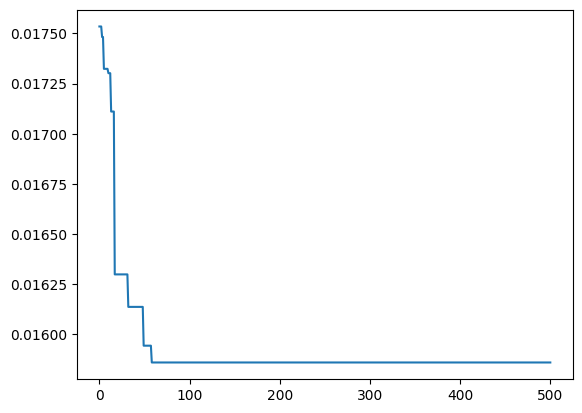

In [11]:
plt.plot(np.linspace(0, 500, 500), genEvCar)
plt.show()